# My Spotify Music

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File 1 2020-2021

In [2]:
df1 = pd.read_json("C:/Users/ZLH12/OneDrive/Desktop/Project Datasets/MySpotifyData/Streaming_History_Audio_2020-2021_1.json")

df1.head()


,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2020-10-07T11:04:19Z,zlh1290,"iOS 14.0.1 (iPhone12,5)",626,US,174.197.146.104,unknown,KEYS TO THE KINGDOM,Tiwa Savage,The Lion King: The Gift [Deluxe Edition],...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,1602068658586,False
1,2020-10-07T11:04:19Z,zlh1290,"iOS 14.0.1 (iPhone12,5)",441,US,174.197.146.104,unknown,BROWN SKIN GIRL,Blue Ivy,The Lion King: The Gift [Deluxe Edition],...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,1602068658137,False
2,2020-10-07T11:08:02Z,zlh1290,"iOS 14.0.1 (iPhone12,5)",223422,US,174.197.146.104,unknown,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],...,None,None,None,fwdbtn,trackdone,False,NaN,False,1602068659227,False
3,2020-10-07T11:11:42Z,zlh1290,"iOS 14.0.1 (iPhone12,5)",220232,US,174.197.146.104,unknown,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],...,None,None,None,trackdone,trackdone,False,NaN,False,1602068881477,False
4,2020-10-07T11:14:26Z,zlh1290,"iOS 14.0.1 (iPhone12,5)",163384,US,174.197.146.104,unknown,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],...,None,None,None,trackdone,fwdbtn,False,NaN,False,1602069101715,False


In [3]:
#drop unwanted columns

df1.drop(df1.columns[[1,2,4,5,6,10,11,12,13,14,18,19]], axis = 1, inplace=True)

df1.head()


,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,reason_end,shuffle,skipped,incognito_mode
0,2020-10-07T11:04:19Z,626,KEYS TO THE KINGDOM,Tiwa Savage,The Lion King: The Gift [Deluxe Edition],fwdbtn,False,NaN,False
1,2020-10-07T11:04:19Z,441,BROWN SKIN GIRL,Blue Ivy,The Lion King: The Gift [Deluxe Edition],fwdbtn,False,NaN,False
2,2020-10-07T11:08:02Z,223422,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],trackdone,False,NaN,False
3,2020-10-07T11:11:42Z,220232,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],trackdone,False,NaN,False
4,2020-10-07T11:14:26Z,163384,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],fwdbtn,False,NaN,False


In [4]:
# drop add'l unwanted columns

df1.drop(df1.columns[[5,8]], axis = 1, inplace=True)

df1.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,shuffle,skipped
0,2020-10-07T11:04:19Z,626,KEYS TO THE KINGDOM,Tiwa Savage,The Lion King: The Gift [Deluxe Edition],False,NaN
1,2020-10-07T11:04:19Z,441,BROWN SKIN GIRL,Blue Ivy,The Lion King: The Gift [Deluxe Edition],False,NaN
2,2020-10-07T11:08:02Z,223422,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],False,NaN
3,2020-10-07T11:11:42Z,220232,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],False,NaN
4,2020-10-07T11:14:26Z,163384,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],False,NaN


In [5]:
# rename columns

df1.rename(columns = {df1.columns[2]:'track_name', 
                            df1.columns[3]:'album_artist', df1.columns[4]:'album_title'}, inplace=True)

df1.head()

,ts,ms_played,track_name,album_artist,album_title,shuffle,skipped
0,2020-10-07T11:04:19Z,626,KEYS TO THE KINGDOM,Tiwa Savage,The Lion King: The Gift [Deluxe Edition],False,NaN
1,2020-10-07T11:04:19Z,441,BROWN SKIN GIRL,Blue Ivy,The Lion King: The Gift [Deluxe Edition],False,NaN
2,2020-10-07T11:08:02Z,223422,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],False,NaN
3,2020-10-07T11:11:42Z,220232,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],False,NaN
4,2020-10-07T11:14:26Z,163384,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],False,NaN


In [6]:
df1.sort_values(by=['ms_played'])

,ts,ms_played,track_name,album_artist,album_title,shuffle,skipped
783,2020-10-13T16:15:19Z,0,My Own Summer (Shove It),Deftones,Around the Fur,True,NaN
6238,2020-12-01T15:15:57Z,0,Sugar Baby,Megan Thee Stallion,Good News,False,NaN
5550,2020-11-23T21:44:56Z,0,Yikes,Nicki Minaj,Yikes,True,NaN
6243,2020-12-01T15:22:35Z,0,Sugar Baby,Megan Thee Stallion,Good News,False,NaN
9722,2020-12-30T16:32:09Z,0,I Could Never Take the Place of Your Man,Prince,"Sign ""O"" the Times",True,NaN
...,...,...,...,...,...,...,...
7083,2020-12-07T19:11:55Z,7134192,None,None,None,False,NaN
4475,2020-11-13T21:00:44Z,7188181,None,None,None,False,NaN
4918,2020-11-17T18:33:17Z,7241848,None,None,None,False,NaN
5708,2020-11-24T20:02:10Z,7935092,None,None,None,False,NaN


In [7]:
# remove occurences of song where ms_played <30000 (30 seconds)

df1 = df1[df1.ms_played >= 30000]

df1.sort_values(by=['ms_played'])

,ts,ms_played,track_name,album_artist,album_title,shuffle,skipped
2372,2020-10-27T13:35:31Z,30024,Stuck with U (with Justin Bieber),Ariana Grande,Stuck with U,True,NaN
8915,2020-12-23T10:04:13Z,30192,Don't Go,Isabela Merced,Don't Go,True,NaN
15896,2021-03-04T22:06:04Z,30250,Fake Happy,Paramore,After Laughter,True,NaN
4694,2020-11-16T11:34:21Z,30465,Fkn Around (feat. Megan Thee Stallion),Phony Ppl,Fkn Around (feat. Megan Thee Stallion),True,NaN
15617,2021-03-03T00:00:55Z,30560,Last Resort,Papa Roach,Infest,True,NaN
...,...,...,...,...,...,...,...
7083,2020-12-07T19:11:55Z,7134192,None,None,None,False,NaN
4475,2020-11-13T21:00:44Z,7188181,None,None,None,False,NaN
4918,2020-11-17T18:33:17Z,7241848,None,None,None,False,NaN
5708,2020-11-24T20:02:10Z,7935092,None,None,None,False,NaN


In [8]:
#remove podcasts

df1 = df1[df1['album_artist'].notna()]

df1.sort_values(by=['ms_played'])

,ts,ms_played,track_name,album_artist,album_title,shuffle,skipped
2372,2020-10-27T13:35:31Z,30024,Stuck with U (with Justin Bieber),Ariana Grande,Stuck with U,True,NaN
8915,2020-12-23T10:04:13Z,30192,Don't Go,Isabela Merced,Don't Go,True,NaN
15896,2021-03-04T22:06:04Z,30250,Fake Happy,Paramore,After Laughter,True,NaN
4694,2020-11-16T11:34:21Z,30465,Fkn Around (feat. Megan Thee Stallion),Phony Ppl,Fkn Around (feat. Megan Thee Stallion),True,NaN
15617,2021-03-03T00:00:55Z,30560,Last Resort,Papa Roach,Infest,True,NaN
...,...,...,...,...,...,...,...
12391,2021-01-26T15:04:41Z,722708,Diamonds and Pearls,Prince,Diamonds and Pearls,True,NaN
989,2020-10-14T20:52:38Z,725579,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...",A$AP Rocky,LONG.LIVE.A$AP (Deluxe Version),True,NaN
3482,2020-11-04T18:43:21Z,780827,positions,Ariana Grande,Positions,False,NaN
3783,2020-11-06T21:23:37Z,876096,When I See U,Fantasia,Fantasia,True,NaN


In [9]:
# drop 'skipped' col

df1 = df1.drop(columns=['skipped'])

df1.sort_values(by=['ms_played'])

,ts,ms_played,track_name,album_artist,album_title,shuffle
2372,2020-10-27T13:35:31Z,30024,Stuck with U (with Justin Bieber),Ariana Grande,Stuck with U,True
8915,2020-12-23T10:04:13Z,30192,Don't Go,Isabela Merced,Don't Go,True
15896,2021-03-04T22:06:04Z,30250,Fake Happy,Paramore,After Laughter,True
4694,2020-11-16T11:34:21Z,30465,Fkn Around (feat. Megan Thee Stallion),Phony Ppl,Fkn Around (feat. Megan Thee Stallion),True
15617,2021-03-03T00:00:55Z,30560,Last Resort,Papa Roach,Infest,True
...,...,...,...,...,...,...
12391,2021-01-26T15:04:41Z,722708,Diamonds and Pearls,Prince,Diamonds and Pearls,True
989,2020-10-14T20:52:38Z,725579,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...",A$AP Rocky,LONG.LIVE.A$AP (Deluxe Version),True
3482,2020-11-04T18:43:21Z,780827,positions,Ariana Grande,Positions,False
3783,2020-11-06T21:23:37Z,876096,When I See U,Fantasia,Fantasia,True


In [10]:
#add play_count column

grouped = df1.groupby(['track_name', 'album_artist']).size().reset_index(name='play_count')

df1 = df1.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_count'))

In [11]:
df1 = df1.drop(columns=['ms_played']).reset_index(drop=True)
df1.head()

,ts,track_name,album_artist,album_title,shuffle,play_count
0,2020-10-07T11:08:02Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],False,15
1,2020-10-07T11:59:33Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],False,15
2,2020-10-07T21:59:08Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],True,15
3,2020-10-09T10:43:56Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],True,15
4,2020-10-15T11:30:56Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],False,15


In [12]:
df1.shape

(7763, 6)

In [13]:
df1 = df1.drop_duplicates().reset_index(drop=True)

df1.shape

(7762, 6)

In [14]:
df1.head()

,ts,track_name,album_artist,album_title,shuffle,play_count
0,2020-10-07T11:08:02Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],False,15
1,2020-10-07T11:59:33Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],False,15
2,2020-10-07T21:59:08Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],True,15
3,2020-10-09T10:43:56Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],True,15
4,2020-10-15T11:30:56Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],False,15


In [15]:
 df1 = df1.drop(columns=['shuffle'])
df1.head()

,ts,track_name,album_artist,album_title,play_count
0,2020-10-07T11:08:02Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
1,2020-10-07T11:59:33Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
2,2020-10-07T21:59:08Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
3,2020-10-09T10:43:56Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
4,2020-10-15T11:30:56Z,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15


In [16]:
#only keep data from 2020

df1 = df1[df1['ts'].str.startswith('2020-')].reset_index(drop=True)

df1.shape

(4227, 5)

In [17]:
#cut ts to year only

df1['ts'] = df1['ts'].str.split('-').str[0]

df1

,ts,track_name,album_artist,album_title,play_count
0,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
1,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
2,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
3,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
4,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
...,...,...,...,...,...
4222,2020,Diamonds and Pearls,Prince,Diamonds and Pearls,7
4223,2020,Batdance,Prince,Batman,2
4224,2020,Raspberry Beret,Prince,Around the World in a Day,4
4225,2020,I Can't Make U Love Me,Prince,Emancipation,1


In [18]:
#rename ts column

df1 = df1.rename(columns={'ts':'year'})

In [19]:
df1

,year,track_name,album_artist,album_title,play_count
0,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
1,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
2,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
3,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
4,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
...,...,...,...,...,...
4222,2020,Diamonds and Pearls,Prince,Diamonds and Pearls,7
4223,2020,Batdance,Prince,Batman,2
4224,2020,Raspberry Beret,Prince,Around the World in a Day,4
4225,2020,I Can't Make U Love Me,Prince,Emancipation,1


In [20]:
# remove dupes where track_name, artist, and play_count match 

df1 = df1.loc[~df1.duplicated(subset=['track_name', 'album_artist', 'play_count'])].reset_index(drop=True)

In [21]:
df1.shape

(673, 5)

In [22]:
df1.head()

,year,track_name,album_artist,album_title,play_count
0,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],15
1,2020,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],8
2,2020,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],10
3,2020,BLACK PARADE,Beyoncé,The Lion King: The Gift [Deluxe Edition],7
4,2020,BIGGER,Beyoncé,The Lion King: The Gift [Deluxe Edition],4


# File 2 2015-2020

In [23]:
df2 = pd.read_json(r"C:\Users\ZLH12\OneDrive\Desktop\Project Datasets\MySpotifyData\Streaming_History_Audio_2015-2020_0.json")

df2.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2015-07-17T06:05:07Z,zlh1290,"iOS 8.4 (iPhone7,2)",69241,US,108.27.55.234,unknown,Fight Song,Rachel Platten,Fight Song - EP,...,None,None,None,clickrow,endplay,False,1.0,False,0,False
1,2017-02-04T21:08:34Z,zlh1290,"iOS 10.2 (iPhone9,2)",9241,US,67.85.36.111,unknown,Plastic 100°C,Sampha,Process,...,None,None,None,clickrow,endplay,False,NaN,False,1486242458651,False
2,2017-02-04T21:47:23Z,zlh1290,"iOS 10.2 (iPhone9,2)",575062,US,70.214.72.160,unknown,Congratulations,Post Malone,Stoney,...,None,None,None,clickrow,trackdone,False,NaN,False,1486242513700,False
3,2017-02-04T21:48:40Z,zlh1290,"iOS 10.2 (iPhone9,2)",76024,US,67.85.36.111,unknown,Up There,Post Malone,Stoney,...,None,None,None,trackdone,backbtn,False,NaN,False,1486244842831,False
4,2017-02-04T21:48:41Z,zlh1290,"iOS 10.2 (iPhone9,2)",487,US,67.85.36.111,unknown,Too Young,Post Malone,Stoney,...,None,None,None,backbtn,backbtn,False,NaN,False,1486244920704,False


In [24]:
df2.shape

(16615, 21)

In [25]:
df2.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [26]:
# drop columns

df2 = df2[['ts', 
           #'username', 'platform', 
           'ms_played', 
           #'conn_country',
       #'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 
           #'spotify_track_uri', 'episode_name',
       #'episode_show_name', 'spotify_episode_uri', 'reason_start',
       #'reason_end', 'shuffle', 'skipped', 'offline', 
           'offline_timestamp'
       #'incognito_mode'
          ]]

df2.shape

(16615, 6)

In [27]:
#only keep data from 2020

df2 = df2[df2['ts'].str.startswith('2020-')].reset_index(drop=True)

df2.shape


(16565, 6)

In [28]:
df2 = df2.rename(columns={'master_metadata_track_name':'track_name', 
                          'master_metadata_album_artist_name':'album_artist',
                         'master_metadata_album_album_name':'album_title'})
df2.head()

,ts,ms_played,track_name,album_artist,album_title,offline_timestamp
0,2020-03-16T00:02:15Z,1216,EARFQUAKE,"Tyler, The Creator",IGOR,1584316842992
1,2020-03-16T00:03:18Z,4394,Are You That Somebody,Aaliyah,Annabelle - The Complete Fantasy Playlist,1584316934953
2,2020-03-16T10:32:28Z,13034,Into You - Alex Ghenea Remix,Ariana Grande,Into You,1584316997924
3,2020-03-16T10:32:47Z,4063,B.I.T.C.H.,Megan Thee Stallion,Suga,1584354761873
4,2020-03-16T10:35:10Z,144047,Ain't Equal,Megan Thee Stallion,Suga,1584354766513


In [29]:
#drop 'offline_timestamp'

df2 = df2.drop(columns=['offline_timestamp'])
df2.shape

(16565, 5)

In [30]:
#cut ts to year only

df2['ts'] = df2['ts'].str.split('-').str[0]

df2

,ts,ms_played,track_name,album_artist,album_title
0,2020,1216,EARFQUAKE,"Tyler, The Creator",IGOR
1,2020,4394,Are You That Somebody,Aaliyah,Annabelle - The Complete Fantasy Playlist
2,2020,13034,Into You - Alex Ghenea Remix,Ariana Grande,Into You
3,2020,4063,B.I.T.C.H.,Megan Thee Stallion,Suga
4,2020,144047,Ain't Equal,Megan Thee Stallion,Suga
...,...,...,...,...,...
16560,2020,1068,Turks (feat. Travis Scott),NAV,Turks
16561,2020,275106,Bed,J. Holiday,Back Of My Lac'
16562,2020,37212,Turks (feat. Travis Scott),NAV,Turks
16563,2020,464,WATER,Salatiel,The Lion King: The Gift [Deluxe Edition]


In [31]:
#rename ts column

df2 = df2.rename(columns={'ts':'year'})

In [32]:
df2.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
1410,2020,0,Fuck Around,Tink,Hopeless Romantic
6004,2020,0,Stupid Again,Tory Lanez,The New Toronto 3
6943,2020,0,Wanna Be Happy?,Kirk Franklin,Wanna Be Happy?
3695,2020,0,Cash Flow,Ace Hood,DJ Khaled Presents Ace Hood Gutta
13243,2020,0,WATER,Salatiel,The Lion King: The Gift [Deluxe Edition]
...,...,...,...,...,...
15649,2020,6284900,None,None,None
16200,2020,6744133,None,None,None
16199,2020,6776033,None,None,None
14658,2020,6914994,None,None,None


In [33]:
# remove occurences of song where ms_played <30000 (30 seconds)

df2 = df2[df2.ms_played >= 30000]

df2.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
15231,2020,30009,None,None,None
10870,2020,30164,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition]
7366,2020,30182,"Bump, Bump, Bump (feat. P. Diddy)",B2K,Greatest Hits
4359,2020,30243,According To You,Orianthi,Believe (II)
11554,2020,30272,Throw Some D's,Rich Boy,Rich Boy
...,...,...,...,...,...
15649,2020,6284900,None,None,None
16200,2020,6744133,None,None,None
16199,2020,6776033,None,None,None
14658,2020,6914994,None,None,None


In [34]:
# find nulls

df2.isna().sum()

year              0
ms_played         0
track_name      323
album_artist    323
album_title     323
dtype: int64

In [35]:
#remove podcasts

df2 = df2[df2['album_artist'].notna()]

df2.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
10870,2020,30164,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition]
7366,2020,30182,"Bump, Bump, Bump (feat. P. Diddy)",B2K,Greatest Hits
4359,2020,30243,According To You,Orianthi,Believe (II)
11554,2020,30272,Throw Some D's,Rich Boy,Rich Boy
8581,2020,30465,Some Cut,Trillville,Welcome to Trillville Usa
...,...,...,...,...,...
8491,2020,771468,Stay Fly,Three 6 Mafia,Most Known Unknown (Explicit)
12752,2020,772148,MOOD 4 EVA (feat. Oumou Sangaré),Beyoncé,The Lion King: The Gift [Deluxe Edition]
12188,2020,788344,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...",A$AP Rocky,LONG.LIVE.A$AP (Deluxe Version)
12230,2020,1404112,Open (Passionate),Kehlani,It Was Good Until It Wasn't


In [36]:
# add play_count column

grouped = df2.groupby(['track_name', 'album_artist']).size().reset_index(name='play_count')

df2 = df2.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_count'))

In [37]:
df2 = df2.drop(columns=['ms_played']).reset_index(drop=True)
df2.head()

,year,track_name,album_artist,album_title,play_count
0,2020,Ain't Equal,Megan Thee Stallion,Suga,34
1,2020,Ain't Equal,Megan Thee Stallion,Suga,34
2,2020,Ain't Equal,Megan Thee Stallion,Suga,34
3,2020,Ain't Equal,Megan Thee Stallion,Suga,34
4,2020,Ain't Equal,Megan Thee Stallion,Suga,34


In [38]:
# drop duplicates

df2 = df2.drop_duplicates().reset_index(drop=True)

df2.head()

,year,track_name,album_artist,album_title,play_count
0,2020,Ain't Equal,Megan Thee Stallion,Suga,34
1,2020,Savage,Megan Thee Stallion,Suga,34
2,2020,Captain Hook,Megan Thee Stallion,Suga,38
3,2020,Hit My Phone (feat. Kehlani),Megan Thee Stallion,Suga,56
4,2020,B.I.T.C.H.,Megan Thee Stallion,Suga,42


# Combine Files 1 & 2 For Complete 2020 Data

In [39]:
df_2020 = pd.concat([df1, df2])

df_2020.shape

(1732, 5)

In [40]:
df1.shape

(673, 5)

In [41]:
df2.shape

(1059, 5)

In [42]:
# id dupes

df_2020.loc[df_2020.duplicated()]

,year,track_name,album_artist,album_title,play_count
228,2020,Deja Vu,Post Malone,Stoney,1
262,2020,Won't Bite (feat. Smino),Doja Cat,Hot Pink,4
263,2020,Rules,Doja Cat,Hot Pink,8
549,2020,Accelerate (feat. Ty Dolla $ign & 2 Chainz),Christina Aguilera,Liberation,8
581,2020,Drunk Dialing...LODT,Summer Walker,Over It,2
584,2020,Red Light Special,TLC,Crazysexycool,3
603,2020,Long Way 2 Go,Cassie,Cassie,11
604,2020,What a Girl Wants,Christina Aguilera,Christina Aguilera (Expanded Edition),7
614,2020,TiK ToK,Kesha,Animal (Expanded Edition),5
638,2020,Between Us (feat. Snoh Aalegra),dvsn,Between Us (feat. Snoh Aalegra),3


In [43]:
# id dupes by col

df_2020.loc[df_2020.duplicated(subset=['track_name'])]

,year,track_name,album_artist,album_title,play_count
174,2020,Weak,SWV,It's About Time,7
316,2020,Focus,H.E.R.,H.E.R.,8
357,2020,My Way,Limp Bizkit,Chocolate Starfish And The Hot Dog Flavored Water,1
430,2020,Body,Pretty Ricky,Body,11
465,2020,Intro,Bo Burnham,what.,1
...,...,...,...,...,...
1030,2020,Grindin',Clipse,Lord Willin',1
1038,2020,Flava in Ya Ear Remix (feat. The Notorious B.I...,Craig Mack,Bad Boy's 10th Anniversary- The Hits,1
1039,2020,Adorn,Miguel,Kaleidoscope Dream,5
1040,2020,Fkn Around (feat. Megan Thee Stallion),Phony Ppl,Fkn Around (feat. Megan Thee Stallion),1


In [44]:
# combine songs dupes and playcount

grouped = df_2020.groupby(['track_name', 'album_artist']).sum('play_count').reset_index()

df_2020 = df_2020.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_sum'))

In [45]:
df_2020.shape

(1732, 6)

In [46]:
df_2020.sort_values(by=['track_name'])

,year,track_name,album_artist,album_title,play_count,play_count_sum
865,2020,"""Fall Back""",Dear Jayne Feat. the Dream,"""Fall Back""",5,5
784,2020,#deep,Bo Burnham,what.,3,3
1130,2020,0.00,Childish Gambino,3.15.20,1,1
962,2020,100 (feat. Drake),The Game,100 (feat. Drake),11,11
984,2020,100 Grandkids,Mac Miller,GO:OD AM,1,2
...,...,...,...,...,...,...
754,2020,six thirty,Ariana Grande,Positions,99,99
896,2020,"thank u, next",Ariana Grande,"thank u, next",4,4
1558,2020,the enTRAPreneur,Jeezy,TM104: The Legend of the Snowman,1,1
670,2020,waves,Miguel,Wildheart,5,5


In [47]:
df_2020 = df_2020.drop(columns=['play_count']).reset_index(drop=True)
df_2020.head()

,year,track_name,album_artist,album_title,play_count_sum
0,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],96
1,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],96
2,2020,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],48
3,2020,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],48
4,2020,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],62


In [48]:
df_2020 = df_2020.rename(columns={'play_count_sum':'play_count'})

df_2020.head()

,year,track_name,album_artist,album_title,play_count
0,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],96
1,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],96
2,2020,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],48
3,2020,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],48
4,2020,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],62


In [49]:
# drop duplicates

df_2020 = df_2020.drop_duplicates().reset_index(drop=True)

df_2020.head()

,year,track_name,album_artist,album_title,play_count
0,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],96
1,2020,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],48
2,2020,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],62
3,2020,BLACK PARADE,Beyoncé,The Lion King: The Gift [Deluxe Edition],67
4,2020,BLACK PARADE,Beyoncé,BLACK PARADE,67


In [50]:
df_2020.head(20)

,year,track_name,album_artist,album_title,play_count
0,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],96
1,2020,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],48
2,2020,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],62
3,2020,BLACK PARADE,Beyoncé,The Lion King: The Gift [Deluxe Edition],67
4,2020,BLACK PARADE,Beyoncé,BLACK PARADE,67
5,2020,BIGGER,Beyoncé,The Lion King: The Gift [Deluxe Edition],29
6,2020,FIND YOUR WAY BACK,Beyoncé,The Lion King: The Gift [Deluxe Edition],63
7,2020,DON'T JEALOUS ME,Tekno,The Lion King: The Gift [Deluxe Edition],51
8,2020,JA ARA E,Burna Boy,The Lion King: The Gift [Deluxe Edition],48
9,2020,NILE,Beyoncé,The Lion King: The Gift [Deluxe Edition],41


In [51]:
# remove dupes where track_name, artist, and play_count match 

df_2020 = df_2020.loc[~df_2020.duplicated(subset=['track_name', 'album_artist', 'play_count'])].reset_index(drop=True)

In [52]:
df_2020.head(20)

,year,track_name,album_artist,album_title,play_count
0,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],96
1,2020,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],48
2,2020,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],62
3,2020,BLACK PARADE,Beyoncé,The Lion King: The Gift [Deluxe Edition],67
4,2020,BIGGER,Beyoncé,The Lion King: The Gift [Deluxe Edition],29
5,2020,FIND YOUR WAY BACK,Beyoncé,The Lion King: The Gift [Deluxe Edition],63
6,2020,DON'T JEALOUS ME,Tekno,The Lion King: The Gift [Deluxe Edition],51
7,2020,JA ARA E,Burna Boy,The Lion King: The Gift [Deluxe Edition],48
8,2020,NILE,Beyoncé,The Lion King: The Gift [Deluxe Edition],41
9,2020,MOOD 4 EVA (feat. Oumou Sangaré),Beyoncé,The Lion King: The Gift [Deluxe Edition],74


Text(0, 0.5, '# of Streams')

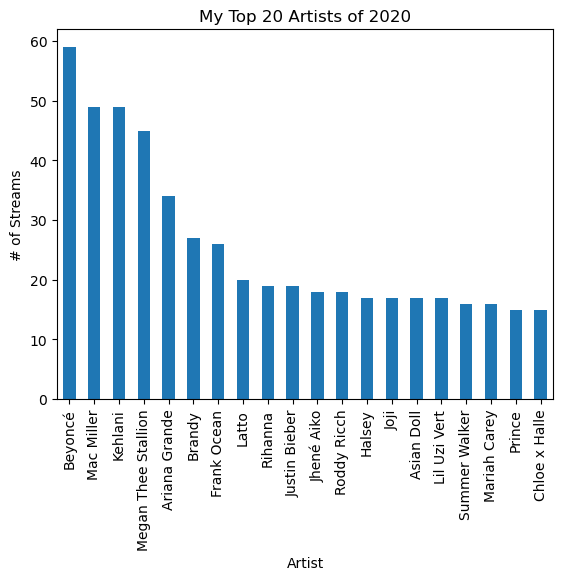

In [53]:
ax = df_2020['album_artist'].value_counts() \
    .head(20) \
    .plot(kind='bar', title='My Top 20 Artists of 2020')
ax.set_xlabel('Artist')
ax.set_ylabel('# of Streams')

# File 3 2021 Pt. 1

In [54]:
df3 = pd.read_json(r"C:\Users\ZLH12\OneDrive\Desktop\Project Datasets\MySpotifyData\Streaming_History_Audio_2020-2021_1.json")

df3.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2020-10-07T11:04:19Z,zlh1290,"iOS 14.0.1 (iPhone12,5)",626,US,174.197.146.104,unknown,KEYS TO THE KINGDOM,Tiwa Savage,The Lion King: The Gift [Deluxe Edition],...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,1602068658586,False
1,2020-10-07T11:04:19Z,zlh1290,"iOS 14.0.1 (iPhone12,5)",441,US,174.197.146.104,unknown,BROWN SKIN GIRL,Blue Ivy,The Lion King: The Gift [Deluxe Edition],...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,1602068658137,False
2,2020-10-07T11:08:02Z,zlh1290,"iOS 14.0.1 (iPhone12,5)",223422,US,174.197.146.104,unknown,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],...,None,None,None,fwdbtn,trackdone,False,NaN,False,1602068659227,False
3,2020-10-07T11:11:42Z,zlh1290,"iOS 14.0.1 (iPhone12,5)",220232,US,174.197.146.104,unknown,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],...,None,None,None,trackdone,trackdone,False,NaN,False,1602068881477,False
4,2020-10-07T11:14:26Z,zlh1290,"iOS 14.0.1 (iPhone12,5)",163384,US,174.197.146.104,unknown,MY POWER,Nija,The Lion King: The Gift [Deluxe Edition],...,None,None,None,trackdone,fwdbtn,False,NaN,False,1602069101715,False


In [55]:
df3.shape

(16696, 21)

In [56]:
df3.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [57]:
# drop columns

df3 = df3[['ts', 
           #'username', 'platform', 
           'ms_played', 
           #'conn_country',
       #'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 
           #'spotify_track_uri', 'episode_name',
       #'episode_show_name', 'spotify_episode_uri', 'reason_start',
       #'reason_end', 'shuffle', 'skipped', 'offline', 
           'offline_timestamp'
       #'incognito_mode'
          ]]

df3.shape

(16696, 6)

In [58]:
#only keep data from 2021

df3 = df3[df3['ts'].str.startswith('2021-')].reset_index(drop=True)

df3.shape


(6971, 6)

In [59]:
#cut ts to year only

df3['ts'] = df3['ts'].str.split('-').str[0]

df3

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,offline_timestamp
0,2021,165590,When You Were Mine,Prince,Dirty Mind,1609346232547
1,2021,118466,GROUP B,"Tyler, The Creator",GROUP B,1609511670896
2,2021,257502,Official Girl (feat. Lil' Wayne),Cassie,Official Girl (feat. Lil' Wayne),1609511788740
3,2021,5091,Last Night (feat. Keyshia Cole),Diddy,Press Play,1609512046742
4,2021,111390,Give Her Some Money,Maliibu Miitch,Give Her Some Money,1609512053295
...,...,...,...,...,...,...
6966,2021,309293,Hate to See Your Heart Break,Paramore,Paramore,1615304113483
6967,2021,267653,The Only Exception,Paramore,Brand New Eyes,1615304423184
6968,2021,203640,Hallelujah,Paramore,Riot!,1615304691352
6969,2021,238626,Born for This,Paramore,Riot!,1615304895489


In [60]:
df3 = df3.rename(columns={'ts':'year','master_metadata_track_name':'track_name', 
                          'master_metadata_album_artist_name':'album_artist',
                         'master_metadata_album_album_name':'album_title'})
df3.head()

,year,ms_played,track_name,album_artist,album_title,offline_timestamp
0,2021,165590,When You Were Mine,Prince,Dirty Mind,1609346232547
1,2021,118466,GROUP B,"Tyler, The Creator",GROUP B,1609511670896
2,2021,257502,Official Girl (feat. Lil' Wayne),Cassie,Official Girl (feat. Lil' Wayne),1609511788740
3,2021,5091,Last Night (feat. Keyshia Cole),Diddy,Press Play,1609512046742
4,2021,111390,Give Her Some Money,Maliibu Miitch,Give Her Some Money,1609512053295


In [61]:
#drop 'offline_timestamp'

df3 = df3.drop(columns=['offline_timestamp'])
df3.shape

(6971, 5)

In [62]:
# remove occurences of song where ms_played <30000 (30 seconds)

df3 = df3[df3.ms_played >= 30000]

df3.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
6171,2021,30250,Fake Happy,Paramore,After Laughter
5892,2021,30560,Last Resort,Papa Roach,Infest
2494,2021,30726,On It,Jazmine Sullivan,Heaux Tales
5838,2021,30928,shut up,Ariana Grande,Positions
325,2021,30970,No Scrubs,TLC,Fanmail
...,...,...,...,...,...
5463,2021,4961082,None,None,None
3629,2021,4981444,None,None,None
5464,2021,5004012,None,None,None
2773,2021,5598930,None,None,None


In [63]:
# find nulls

df3.isna().sum()

year              0
ms_played         0
track_name      119
album_artist    119
album_title     119
dtype: int64

In [64]:
#remove podcasts

df3 = df3[df3['album_artist'].notna()]

df3.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
6171,2021,30250,Fake Happy,Paramore,After Laughter
5892,2021,30560,Last Resort,Papa Roach,Infest
2494,2021,30726,On It,Jazmine Sullivan,Heaux Tales
5838,2021,30928,shut up,Ariana Grande,Positions
325,2021,30970,No Scrubs,TLC,Fanmail
...,...,...,...,...,...
2019,2021,606533,Pick Up Your Feelings,Jazmine Sullivan,Heaux Tales
3081,2021,614072,nasty,Ariana Grande,Positions
1034,2021,661070,Last Night (feat. Keyshia Cole),Diddy,Press Play
3261,2021,663313,Pick Up Your Feelings,Jazmine Sullivan,Heaux Tales


In [65]:
# add play_count column

grouped = df3.groupby(['track_name', 'album_artist']).size().reset_index(name='play_count')

df3 = df3.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_count'))

In [66]:
df3 = df3.drop(columns=['ms_played']).reset_index(drop=True)
df3.head()

,year,track_name,album_artist,album_title,play_count
0,2021,When You Were Mine,Prince,Dirty Mind,4
1,2021,When You Were Mine,Prince,Dirty Mind,4
2,2021,When You Were Mine,Prince,Dirty Mind,4
3,2021,When You Were Mine,Prince,Dirty Mind,4
4,2021,GROUP B,"Tyler, The Creator",GROUP B,1


In [67]:
# drop duplicates

df3 = df3.drop_duplicates().reset_index(drop=True)

df3.head()

,year,track_name,album_artist,album_title,play_count
0,2021,When You Were Mine,Prince,Dirty Mind,4
1,2021,GROUP B,"Tyler, The Creator",GROUP B,1
2,2021,Official Girl (feat. Lil' Wayne),Cassie,Official Girl (feat. Lil' Wayne),5
3,2021,Give Her Some Money,Maliibu Miitch,Give Her Some Money,4
4,2021,Shots Fired,Megan Thee Stallion,Good News,10


# File 4 2021 Pt. 2

In [68]:
df4 = pd.read_json(r"C:\Users\ZLH12\OneDrive\Desktop\Project Datasets\MySpotifyData\Streaming_History_Audio_2021_2.json")

df4.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-03-09T15:58:54Z,zlh1290,"iOS 14.4 (iPhone12,5)",212853,US,174.197.132.211,unknown,Rose-Colored Boy,Paramore,After Laughter,...,None,None,None,trackdone,trackdone,True,NaN,False,1615305320226,False
1,2021-03-09T16:02:13Z,zlh1290,"iOS 14.4 (iPhone12,5)",198762,US,174.197.132.211,unknown,Monster - Transformers Soundtrack Version,Paramore,Monster,...,None,None,None,trackdone,trackdone,True,NaN,False,1615305533562,False
2,2021-03-09T16:05:15Z,zlh1290,"iOS 14.4 (iPhone12,5)",181506,US,174.197.132.211,unknown,Misguided Ghosts,Paramore,Brand New Eyes,...,None,None,None,trackdone,trackdone,True,NaN,False,1615305732818,False
3,2021-03-09T16:08:54Z,zlh1290,"iOS 14.4 (iPhone12,5)",218333,US,174.197.132.211,unknown,We Are Broken,Paramore,Riot!,...,None,None,None,trackdone,trackdone,True,NaN,False,1615305914825,False
4,2021-03-09T16:20:53Z,zlh1290,"iOS 14.4 (iPhone12,5)",185733,US,174.197.132.211,unknown,Pressure,Paramore,All We Know Is Falling,...,None,None,None,trackdone,trackdone,True,NaN,False,1615306133641,False


In [69]:
df4.shape

(16680, 21)

In [70]:
df4.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [71]:
# drop columns

df4 = df4[['ts', 
           #'username', 'platform', 
           'ms_played', 
           #'conn_country',
       #'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 
           #'spotify_track_uri', 'episode_name',
       #'episode_show_name', 'spotify_episode_uri', 'reason_start',
       #'reason_end', 'shuffle', 'skipped', 'offline', 
           #'offline_timestamp'
       #'incognito_mode'
          ]]

df4.shape

(16680, 5)

In [72]:
#cut ts to year only

df4['ts'] = df4['ts'].str.split('-').str[0]

df4

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name
0,2021,212853,Rose-Colored Boy,Paramore,After Laughter
1,2021,198762,Monster - Transformers Soundtrack Version,Paramore,Monster
2,2021,181506,Misguided Ghosts,Paramore,Brand New Eyes
3,2021,218333,We Are Broken,Paramore,Riot!
4,2021,185733,Pressure,Paramore,All We Know Is Falling
...,...,...,...,...,...
16675,2021,770,In Too Deep,Sum 41,"All Killer, No Filler"
16676,2021,1340,Want You Bad,The Offspring,Conspiracy Of One
16677,2021,1100,Miss Murder,AFI,DECEMBERUNDERGROUND
16678,2021,1090,Want You Bad,The Offspring,Conspiracy Of One


In [73]:
df4 = df4.rename(columns={'ts':'year','master_metadata_track_name':'track_name', 
                          'master_metadata_album_artist_name':'album_artist',
                         'master_metadata_album_album_name':'album_title'})
df4.head()

,year,ms_played,track_name,album_artist,album_title
0,2021,212853,Rose-Colored Boy,Paramore,After Laughter
1,2021,198762,Monster - Transformers Soundtrack Version,Paramore,Monster
2,2021,181506,Misguided Ghosts,Paramore,Brand New Eyes
3,2021,218333,We Are Broken,Paramore,Riot!
4,2021,185733,Pressure,Paramore,All We Know Is Falling


In [74]:
# remove occurences of song where ms_played <30000 (30 seconds)

df4 = df4[df4.ms_played >= 30000]

df4.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
9723,2021,30330,Youth of the Nation,P.O.D.,Satellite
8594,2021,30400,Change (In the House of Flies),Deftones,White Pony
13727,2021,30603,"Baby, I'm Back",Baby Bash,Super Saucy
8635,2021,30630,Highway Tune,Greta Van Fleet,From The Fires
15326,2021,30680,Hey Mr. D.J. - Original Mix - Edit,Zhané,R&B - 100 Hits - The Greatest R n B album - 10...
...,...,...,...,...,...
244,2021,3788480,None,None,None
4148,2021,3973630,None,None,None
9873,2021,4029961,None,None,None
585,2021,4339640,None,None,None


In [75]:
# find nulls

df4.isna().sum()

year             0
ms_played        0
track_name      15
album_artist    15
album_title     15
dtype: int64

In [76]:
#remove podcasts

df4 = df4[df4['album_artist'].notna()]

df4.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
9723,2021,30330,Youth of the Nation,P.O.D.,Satellite
8594,2021,30400,Change (In the House of Flies),Deftones,White Pony
13727,2021,30603,"Baby, I'm Back",Baby Bash,Super Saucy
8635,2021,30630,Highway Tune,Greta Van Fleet,From The Fires
15326,2021,30680,Hey Mr. D.J. - Original Mix - Edit,Zhané,R&B - 100 Hits - The Greatest R n B album - 10...
...,...,...,...,...,...
15866,2021,766704,Do I Wanna Know?,Arctic Monkeys,AM
8771,2021,796840,Misery Business,Paramore,Riot!
9305,2021,899740,Take A Look Around,Limp Bizkit,Chocolate Starfish And The Hot Dog Flavored Water
10443,2021,972810,Take A Look Around,Limp Bizkit,Chocolate Starfish And The Hot Dog Flavored Water


In [77]:
# add play_count column

grouped = df4.groupby(['track_name', 'album_artist']).size().reset_index(name='play_count')

df4 = df4.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_count'))

In [78]:
df4 = df4.drop(columns=['ms_played']).reset_index(drop=True)
df4.head()

,year,track_name,album_artist,album_title,play_count
0,2021,Rose-Colored Boy,Paramore,After Laughter,26
1,2021,Rose-Colored Boy,Paramore,After Laughter,26
2,2021,Rose-Colored Boy,Paramore,After Laughter,26
3,2021,Rose-Colored Boy,Paramore,After Laughter,26
4,2021,Rose-Colored Boy,Paramore,After Laughter,26


In [79]:
# drop duplicates

df4 = df4.drop_duplicates().reset_index(drop=True)

df4.head()

,year,track_name,album_artist,album_title,play_count
0,2021,Rose-Colored Boy,Paramore,After Laughter,26
1,2021,Monster - Transformers Soundtrack Version,Paramore,Monster,19
2,2021,Misguided Ghosts,Paramore,Brand New Eyes,13
3,2021,We Are Broken,Paramore,Riot!,8
4,2021,Pressure,Paramore,All We Know Is Falling,17


# File 5 2021 Pt. 3

In [80]:
df5 = pd.read_json(r"C:\Users\ZLH12\OneDrive\Desktop\Project Datasets\MySpotifyData\Streaming_History_Audio_2021_3.json")

df5.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-06-07T22:44:25Z,zlh1290,"iOS 14.4.2 (iPhone12,5)",640,US,174.244.147.63,unknown,Can't Stop,Red Hot Chili Peppers,By the Way,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1623105863954,False
1,2021-06-07T22:44:26Z,zlh1290,"iOS 14.4.2 (iPhone12,5)",1220,US,174.244.147.63,unknown,Down with the Sickness,Disturbed,The Sickness,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1623105864599,False
2,2021-06-07T22:44:27Z,zlh1290,"iOS 14.4.2 (iPhone12,5)",1200,US,174.244.147.63,unknown,Uprising,Muse,The Resistance,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1623105865837,False
3,2021-06-07T22:44:30Z,zlh1290,"iOS 14.4.2 (iPhone12,5)",2860,US,174.244.147.63,unknown,Like a Stone,Audioslave,Audioslave,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1623105867051,False
4,2021-06-07T22:44:31Z,zlh1290,"iOS 14.4.2 (iPhone12,5)",750,US,174.244.147.63,unknown,Blurry,Puddle Of Mudd,Come Clean,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1623105869935,False


In [81]:
df5.shape

(16669, 21)

In [82]:
df5.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [83]:
# drop columns

df5 = df5[['ts', 
           #'username', 'platform', 
           'ms_played', 
           #'conn_country',
       #'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 
           #'spotify_track_uri', 'episode_name',
       #'episode_show_name', 'spotify_episode_uri', 'reason_start',
       #'reason_end', 'shuffle', 'skipped', 'offline', 
           #'offline_timestamp'
       #'incognito_mode'
          ]]

df5.shape

(16669, 5)

In [84]:
#cut ts to year only

df5['ts'] = df5['ts'].str.split('-').str[0]

df5.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name
0,2021,640,Can't Stop,Red Hot Chili Peppers,By the Way
1,2021,1220,Down with the Sickness,Disturbed,The Sickness
2,2021,1200,Uprising,Muse,The Resistance
3,2021,2860,Like a Stone,Audioslave,Audioslave
4,2021,750,Blurry,Puddle Of Mudd,Come Clean


In [85]:
df5 = df5.rename(columns={'ts':'year','master_metadata_track_name':'track_name', 
                          'master_metadata_album_artist_name':'album_artist',
                         'master_metadata_album_album_name':'album_title'})
df5.head()

,year,ms_played,track_name,album_artist,album_title
0,2021,640,Can't Stop,Red Hot Chili Peppers,By the Way
1,2021,1220,Down with the Sickness,Disturbed,The Sickness
2,2021,1200,Uprising,Muse,The Resistance
3,2021,2860,Like a Stone,Audioslave,Audioslave
4,2021,750,Blurry,Puddle Of Mudd,Come Clean


In [86]:
# remove occurences of song where ms_played <30000 (30 seconds)

df5 = df5[df5.ms_played >= 30000]

df5.sort_values(by=['ms_played']).head(3)

,year,ms_played,track_name,album_artist,album_title
6562,2021,30080,Put On,Jeezy,The Recession
13538,2021,30080,One In A Million,Aaliyah,One In A Million
6153,2021,30120,Knockout,Lil Wayne,Rebirth


In [87]:
# find nulls

df5.isna().sum()

year              0
ms_played         0
track_name      101
album_artist    101
album_title     101
dtype: int64

In [88]:
#remove podcasts

df5 = df5[df5['album_artist'].notna()]

df5.sort_values(by=['ms_played']).head(3)

,year,ms_played,track_name,album_artist,album_title
6562,2021,30080,Put On,Jeezy,The Recession
13538,2021,30080,One In A Million,Aaliyah,One In A Million
6153,2021,30120,Knockout,Lil Wayne,Rebirth


In [89]:
# add play_count column

grouped = df5.groupby(['track_name', 'album_artist']).size().reset_index(name='play_count')

df5 = df5.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_count'))

In [90]:
df5 = df5.drop(columns=['ms_played']).reset_index(drop=True)
df5.head()

,year,track_name,album_artist,album_title,play_count
0,2021,Chop Suey!,System Of A Down,Toxicity,7
1,2021,Chop Suey!,System Of A Down,Toxicity,7
2,2021,Chop Suey!,System Of A Down,Toxicity,7
3,2021,Chop Suey!,System Of A Down,Toxicity,7
4,2021,Chop Suey!,System Of A Down,Toxicity,7


In [91]:
# drop duplicates

df5 = df5.drop_duplicates().reset_index(drop=True)

df5.head()

,year,track_name,album_artist,album_title,play_count
0,2021,Chop Suey!,System Of A Down,Toxicity,7
1,2021,American Idiot,Green Day,American Idiot,3
2,2021,I Hate Everything About You,Three Days Grace,Three Days Grace,8
3,2021,I Luv It,Jeezy,The Inspiration,7
4,2021,I Get Crazy (feat. Lil Wayne),Nicki Minaj,Beam Me Up Scotty,13


# File 6 2021 Pt. 4

In [92]:
df6 = pd.read_json(r"C:\Users\ZLH12\OneDrive\Desktop\Project Datasets\MySpotifyData\Streaming_History_Audio_2021-2022_4.json")

df6.shape

(16703, 21)

In [93]:
df6.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [94]:
# drop columns

df6 = df6[['ts', 
           #'username', 'platform', 
           'ms_played', 
           #'conn_country',
       #'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 
           #'spotify_track_uri', 'episode_name',
       #'episode_show_name', 'spotify_episode_uri', 'reason_start',
       #'reason_end', 'shuffle', 'skipped', 'offline', 
           'offline_timestamp'
       #'incognito_mode'
          ]]

df6.shape

(16703, 6)

In [95]:
#only keep data from 2021

df6 = df6[df6['ts'].str.startswith('2021-')].reset_index(drop=True)

df6.shape

(13469, 6)

In [96]:
#cut ts to year only

df6['ts'] = df6['ts'].str.split('-').str[0]

In [97]:
df6 = df6.rename(columns={'ts':'year','master_metadata_track_name':'track_name', 
                          'master_metadata_album_artist_name':'album_artist',
                         'master_metadata_album_album_name':'album_title'})
df6.columns

Index(['year', 'ms_played', 'track_name', 'album_artist', 'album_title',
       'offline_timestamp'],
      dtype='object')

In [98]:
#drop 'offline_timestamp'

df6 = df6.drop(columns=['offline_timestamp'])
df6.shape

(13469, 5)

In [99]:
# remove occurences of song where ms_played <30000 (30 seconds)

df6 = df6[df6.ms_played >= 30000]

df6.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
1292,2021,30310,A Kiss,THE DRIVER ERA,A Kiss / Forever Always
4067,2021,30388,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21...",Nardo Wick,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21..."
8745,2021,30389,So Cold,Tkay Maidza,"Last Year Was Weird, Vol. 3"
2338,2021,30416,Always Be My Baby,Mariah Carey,Daydream
13447,2021,30487,JUGGERNAUT (feat. Lil Uzi Vert & Pharrell Will...,"Tyler, The Creator",CALL ME IF YOU GET LOST
...,...,...,...,...,...
1999,2021,2742130,None,None,None
592,2021,3057690,None,None,None
3091,2021,3099520,None,None,None
12071,2021,4269510,None,None,None


In [100]:
# find nulls

df6.isna().sum()

year             0
ms_played        0
track_name      27
album_artist    27
album_title     27
dtype: int64

In [101]:
#remove podcasts

df6 = df6[df6['album_artist'].notna()]

df6.sort_values(by=['ms_played']).head()

,year,ms_played,track_name,album_artist,album_title
1292,2021,30310,A Kiss,THE DRIVER ERA,A Kiss / Forever Always
4067,2021,30388,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21...",Nardo Wick,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21..."
8745,2021,30389,So Cold,Tkay Maidza,"Last Year Was Weird, Vol. 3"
2338,2021,30416,Always Be My Baby,Mariah Carey,Daydream
13447,2021,30487,JUGGERNAUT (feat. Lil Uzi Vert & Pharrell Will...,"Tyler, The Creator",CALL ME IF YOU GET LOST


In [102]:
# add play_count column

grouped = df6.groupby(['track_name', 'album_artist']).size().reset_index(name='play_count')

df6 = df6.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_count'))

In [103]:
df6 = df6.drop(columns=['ms_played']).reset_index(drop=True)

In [104]:
# drop duplicates

df6 = df6.drop_duplicates().reset_index(drop=True)


# Combine Files 3-6 For Complete 2021 Data

In [105]:
df_2021 = pd.concat([df3, df4, df5, df6])

df_2021.shape

(4102, 5)

In [106]:
df3.shape

(736, 5)

In [107]:
df4.shape

(1080, 5)

In [108]:
df5.shape

(1246, 5)

In [109]:
df6.shape

(1040, 5)

In [110]:
# id dupes by col

df_2021.loc[df_2021.duplicated(subset=['track_name'])]

,year,track_name,album_artist,album_title,play_count
18,2021,Savage Remix (feat. Beyoncé),Megan Thee Stallion,Savage Remix (feat. Beyoncé),7
110,2021,Body,Pretty Ricky,Body,3
125,2021,Pick Up Your Feelings,Jazmine Sullivan,Heaux Tales,42
162,2021,Lost One,Jazmine Sullivan,Heaux Tales,24
190,2021,7,Prince,[Love Symbol],4
...,...,...,...,...,...
1006,2021,Backin' It Up (feat. Cardi B),Pardison Fontaine,Backin' It Up (feat. Cardi B),1
1007,2021,Teenage Fever,Drake,More Life,1
1008,2021,Things Can Only Get Better - 2018 Remaster,Howard Jones,Dream Into Action,2
1034,2021,I'm Still in Love with You (feat. Sasha),Sean Paul,Dutty Rock,1


In [111]:
# combine songs dupes and playcount

grouped = df_2021.groupby(['track_name', 'album_artist']).sum('play_count').reset_index()

df_2021 = df_2021.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_sum'))

In [112]:
df_2021.shape

(4102, 6)

In [113]:
df_2021.sort_values(by=['track_name'])

,year,track_name,album_artist,album_title,play_count,play_count_sum
1008,2021,"""Fall Back""",Dear Jayne Feat. the Dream,"""Fall Back""",3,7
1009,2021,"""Fall Back""",Dear Jayne Feat. the Dream,"""Fall Back""",2,7
1010,2021,"""Fall Back""",Dear Jayne Feat. the Dream,"""Fall Back""",1,7
1011,2021,"""Fall Back""",Dear Jayne Feat. the Dream,"""Fall Back""",1,7
3970,2021,#deep,Bo Burnham,what.,1,1
...,...,...,...,...,...,...
1732,2021,worst behavior,Ariana Grande,Positions,5,53
1731,2021,worst behavior,Ariana Grande,Positions,6,53
1729,2021,worst behavior,Ariana Grande,Positions,40,53
1730,2021,worst behavior,Ariana Grande,Positions,2,53


In [114]:
df_2021 = df_2021.drop(columns=['play_count']).reset_index(drop=True)
df_2021.head()

,year,track_name,album_artist,album_title,play_count_sum
0,2021,When You Were Mine,Prince,Dirty Mind,4
1,2021,GROUP B,"Tyler, The Creator",GROUP B,7
2,2021,GROUP B,"Tyler, The Creator",GROUP B,7
3,2021,GROUP B,"Tyler, The Creator",GROUP B,7
4,2021,Official Girl (feat. Lil' Wayne),Cassie,Official Girl (feat. Lil' Wayne),16


In [115]:
df_2021 = df_2021.rename(columns={'play_count_sum':'play_count'})

df_2021.head()

,year,track_name,album_artist,album_title,play_count
0,2021,When You Were Mine,Prince,Dirty Mind,4
1,2021,GROUP B,"Tyler, The Creator",GROUP B,7
2,2021,GROUP B,"Tyler, The Creator",GROUP B,7
3,2021,GROUP B,"Tyler, The Creator",GROUP B,7
4,2021,Official Girl (feat. Lil' Wayne),Cassie,Official Girl (feat. Lil' Wayne),16


In [116]:
# remove dupes where track_name, artist, and play_count match 

df_2021 = df_2021.loc[~df_2021.duplicated(subset=['track_name', 'album_artist', 'play_count'])].reset_index(drop=True)

In [117]:
df_2021.head(20)

,year,track_name,album_artist,album_title,play_count
0,2021,When You Were Mine,Prince,Dirty Mind,4
1,2021,GROUP B,"Tyler, The Creator",GROUP B,7
2,2021,Official Girl (feat. Lil' Wayne),Cassie,Official Girl (feat. Lil' Wayne),16
3,2021,Give Her Some Money,Maliibu Miitch,Give Her Some Money,17
4,2021,Shots Fired,Megan Thee Stallion,Good News,11
5,2021,Circles,Megan Thee Stallion,Good News,42
6,2021,Cry Baby (feat. DaBaby),Megan Thee Stallion,Good News,34
7,2021,Sugar Baby,Megan Thee Stallion,Good News,28
8,2021,Movie (feat. Lil Durk),Megan Thee Stallion,Good News,28
9,2021,Freaky Girls (feat. SZA),Megan Thee Stallion,Good News,46


Text(0, 0.5, '# of Streams')

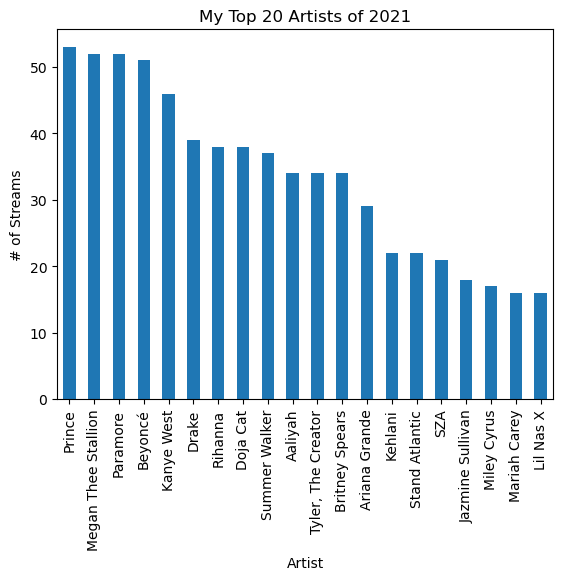

In [118]:
ax = df_2021['album_artist'].value_counts() \
    .head(20) \
    .plot(kind='bar', title='My Top 20 Artists of 2021')
ax.set_xlabel('Artist')
ax.set_ylabel('# of Streams')

# File 7 2022 Pt. 1

In [119]:
df7 = pd.read_json(r"C:\Users\ZLH12\OneDrive\Desktop\Project Datasets\MySpotifyData\Streaming_History_Audio_2021-2022_4.json")

df7.shape

(16703, 21)

In [120]:
df7.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [121]:
# drop columns

df7 = df7[['ts', 
           #'username', 'platform', 
           'ms_played', 
           #'conn_country',
       #'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 
           #'spotify_track_uri', 'episode_name',
       #'episode_show_name', 'spotify_episode_uri', 'reason_start',
       #'reason_end', 'shuffle', 'skipped', 'offline', 
           'offline_timestamp'
       #'incognito_mode'
          ]]

df7.shape

(16703, 6)

In [122]:
#only keep data from 2022

df7 = df7[df7['ts'].str.startswith('2022-')].reset_index(drop=True)

df7.shape

(3234, 6)

In [123]:
#cut ts to year only

df7['ts'] = df7['ts'].str.split('-').str[0]

df7

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,offline_timestamp
0,2022,236433,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),1641047357719
1,2022,132832,YA!,Oscar #Worldpeace,YA! / WTF?,1641047591783
2,2022,14478,Go Crazy (feat. Big Sean & 2 Chainz),Megan Thee Stallion,Good News,1641047722891
3,2022,2700,The Jackie (with J. Cole & Lil Tjay),Bas,The Jackie (with J. Cole & Lil Tjay),1641047738565
4,2022,154936,Came and Saw (feat. Rowdy Rebel),Young Stoner Life,Slime Language 2,1641047741270
...,...,...,...,...,...,...
3229,2022,138269,LUMBERJACK,"Tyler, The Creator",LUMBERJACK,1642672026015
3230,2022,255543,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21...",Nardo Wick,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21...",1642672164544
3231,2022,189107,Maybach (feat. Future),42 Dugg,Free Dem Boyz,1642672415464
3232,2022,3515,Go Crazy (feat. Big Sean & 2 Chainz),Megan Thee Stallion,Good News,1642672603009


In [124]:
df7 = df7.rename(columns={'ts':'year','master_metadata_track_name':'track_name', 
                          'master_metadata_album_artist_name':'album_artist',
                         'master_metadata_album_album_name':'album_title'})
df7.head()

,year,ms_played,track_name,album_artist,album_title,offline_timestamp
0,2022,236433,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),1641047357719
1,2022,132832,YA!,Oscar #Worldpeace,YA! / WTF?,1641047591783
2,2022,14478,Go Crazy (feat. Big Sean & 2 Chainz),Megan Thee Stallion,Good News,1641047722891
3,2022,2700,The Jackie (with J. Cole & Lil Tjay),Bas,The Jackie (with J. Cole & Lil Tjay),1641047738565
4,2022,154936,Came and Saw (feat. Rowdy Rebel),Young Stoner Life,Slime Language 2,1641047741270


In [125]:
#drop 'offline_timestamp'

df7 = df7.drop(columns=['offline_timestamp'])
df7.shape

(3234, 5)

In [126]:
# remove occurences of song where ms_played <30000 (30 seconds)

df7 = df7[df7.ms_played >= 30000]

df7.sort_values(by=['ms_played']).head()

,year,ms_played,track_name,album_artist,album_title
2570,2022,30752,Say I,Christina Milian,So Amazin'
2243,2022,30972,VickeeLo and Dino Btw Skit (feat. VickeeLo and...,Megan Thee Stallion,Something for Thee Hotties
18,2022,31260,Headshots (4r da Locals),Isaiah Rashad,Headshots (4r Da Locals)
1786,2022,31584,Silk Sonic Intro,Bruno Mars,An Evening With Silk Sonic
863,2022,31750,Baby Don't Lie,Gwen Stefani,Baby Don't Lie


In [127]:
# find nulls

df7.isna().sum()

year            0
ms_played       0
track_name      1
album_artist    1
album_title     1
dtype: int64

In [128]:
#remove podcasts

df7 = df7[df7['album_artist'].notna()]

df7.sort_values(by=['ms_played']).head()

,year,ms_played,track_name,album_artist,album_title
2570,2022,30752,Say I,Christina Milian,So Amazin'
2243,2022,30972,VickeeLo and Dino Btw Skit (feat. VickeeLo and...,Megan Thee Stallion,Something for Thee Hotties
18,2022,31260,Headshots (4r da Locals),Isaiah Rashad,Headshots (4r Da Locals)
1786,2022,31584,Silk Sonic Intro,Bruno Mars,An Evening With Silk Sonic
863,2022,31750,Baby Don't Lie,Gwen Stefani,Baby Don't Lie


In [129]:
# add play_count column

grouped = df7.groupby(['track_name', 'album_artist']).size().reset_index(name='play_count')

df7 = df7.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_count'))

In [130]:
df7 = df7.drop(columns=['ms_played']).reset_index(drop=True)
df7.head()

,year,track_name,album_artist,album_title,play_count
0,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),2
1,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),2
2,2022,YA!,Oscar #Worldpeace,YA! / WTF?,1
3,2022,Came and Saw (feat. Rowdy Rebel),Young Stoner Life,Slime Language 2,6
4,2022,Came and Saw (feat. Rowdy Rebel),Young Stoner Life,Slime Language 2,6


In [131]:
# drop duplicates

df7 = df7.drop_duplicates().reset_index(drop=True)

df7.head()

,year,track_name,album_artist,album_title,play_count
0,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),2
1,2022,YA!,Oscar #Worldpeace,YA! / WTF?,1
2,2022,Came and Saw (feat. Rowdy Rebel),Young Stoner Life,Slime Language 2,6
3,2022,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q),2
4,2022,Thot Shit,Megan Thee Stallion,Thot Shit,4


# File 8 2022 Pt. 2

In [132]:
df8 = pd.read_json(r"C:\Users\ZLH12\OneDrive\Desktop\Project Datasets\MySpotifyData\Streaming_History_Audio_2022_5.json")

df8.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2022-01-20T09:59:19Z,zlh1290,"iOS 15.1 (iPhone14,3)",143986,US,71.167.202.52,unknown,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q),...,None,None,None,fwdbtn,trackdone,True,NaN,False,1642672616513,False
1,2022-01-20T12:01:07Z,zlh1290,"iOS 15.1 (iPhone14,3)",4843,US,174.244.179.47,unknown,Thot Shit,Megan Thee Stallion,Thot Shit,...,None,None,None,trackdone,fwdbtn,True,NaN,False,1642672758195,False
2,2022-01-20T12:01:08Z,zlh1290,"iOS 15.1 (iPhone14,3)",890,US,174.244.179.47,unknown,Fly With Me (feat. Conway the Machine),Benny The Butcher,Pyrex Picasso,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1642680067119,False
3,2022-01-20T12:07:56Z,zlh1290,"iOS 15.1 (iPhone14,3)",363808,US,174.244.179.47,unknown,Lemon Pepper Freestyle (feat. Rick Ross),Drake,Scary Hours 2,...,None,None,None,fwdbtn,trackdone,True,NaN,False,1642680068024,False
4,2022-01-20T12:13:45Z,zlh1290,"iOS 15.1 (iPhone14,3)",206016,US,174.244.179.47,unknown,Solid (feat. Drake),Young Stoner Life,Slime Language 2,...,None,None,None,trackdone,trackdone,True,NaN,False,1642680474846,False


In [133]:
df8.shape

(16704, 21)

In [134]:
df8.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [135]:
# drop columns

df8 = df8[['ts', 
           #'username', 'platform', 
           'ms_played', 
           #'conn_country',
       #'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 
           #'spotify_track_uri', 'episode_name',
       #'episode_show_name', 'spotify_episode_uri', 'reason_start',
       #'reason_end', 'shuffle', 'skipped', 'offline', 
           #'offline_timestamp'
       #'incognito_mode'
          ]]

df8.shape

(16704, 5)

In [136]:
#cut ts to year only

df8['ts'] = df8['ts'].str.split('-').str[0]

df8

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name
0,2022,143986,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q)
1,2022,4843,Thot Shit,Megan Thee Stallion,Thot Shit
2,2022,890,Fly With Me (feat. Conway the Machine),Benny The Butcher,Pyrex Picasso
3,2022,363808,Lemon Pepper Freestyle (feat. Rick Ross),Drake,Scary Hours 2
4,2022,206016,Solid (feat. Drake),Young Stoner Life,Slime Language 2
...,...,...,...,...,...
16699,2022,1140,Always Be My Baby,Mariah Carey,Daydream
16700,2022,1240,7 Things - Single Version,Miley Cyrus,Breakout
16701,2022,610,Same Ol’ Mistakes,Rihanna,ANTI
16702,2022,930,"Me, Myself and I",Beyoncé,Dangerously In Love


In [137]:
df8 = df8.rename(columns={'ts':'year','master_metadata_track_name':'track_name', 
                          'master_metadata_album_artist_name':'album_artist',
                         'master_metadata_album_album_name':'album_title'})
df8.head()

,year,ms_played,track_name,album_artist,album_title
0,2022,143986,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q)
1,2022,4843,Thot Shit,Megan Thee Stallion,Thot Shit
2,2022,890,Fly With Me (feat. Conway the Machine),Benny The Butcher,Pyrex Picasso
3,2022,363808,Lemon Pepper Freestyle (feat. Rick Ross),Drake,Scary Hours 2
4,2022,206016,Solid (feat. Drake),Young Stoner Life,Slime Language 2


In [138]:
# remove occurences of song where ms_played <30000 (30 seconds)

df8 = df8[df8.ms_played >= 30000]


In [139]:
# find nulls

df8.isna().sum()

year            0
ms_played       0
track_name      9
album_artist    9
album_title     9
dtype: int64

In [140]:
#remove podcasts

df8 = df8[df8['album_artist'].notna()]


In [141]:
# add play_count column

grouped = df8.groupby(['track_name', 'album_artist']).size().reset_index(name='play_count')

df8 = df8.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_count'))

In [142]:
df8 = df8.drop(columns=['ms_played']).reset_index(drop=True)
df8.head()

,year,track_name,album_artist,album_title,play_count
0,2022,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q),6
1,2022,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q),6
2,2022,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q),6
3,2022,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q),6
4,2022,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q),6


In [143]:
# drop duplicates

df8 = df8.drop_duplicates().reset_index(drop=True)

df8.head()

,year,track_name,album_artist,album_title,play_count
0,2022,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q),6
1,2022,Lemon Pepper Freestyle (feat. Rick Ross),Drake,Scary Hours 2,15
2,2022,Solid (feat. Drake),Young Stoner Life,Slime Language 2,6
3,2022,"SORRY NOT SORRY (feat. Nas, JAY-Z & James Faun...",DJ Khaled,KHALED KHALED,1
4,2022,SKATE,BIA,FOR CERTAIN,6


# File 9 2022 Pt. 3

In [144]:
df9 = pd.read_json(r"C:\Users\ZLH12\OneDrive\Desktop\Project Datasets\MySpotifyData\Streaming_History_Audio_2022_6.json")

df9.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2022-05-04T12:00:56Z,zlh1290,"iOS 15.4.1 (iPhone14,3)",530,US,174.197.144.189,unknown,Turnt,The-Dream,IV Play,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1651665655471,False
1,2022-05-04T12:00:57Z,zlh1290,"iOS 15.4.1 (iPhone14,3)",750,US,174.197.144.189,unknown,Liz,Remi Wolf,Liz,...,None,None,None,fwdbtn,backbtn,True,NaN,False,1651665656020,False
2,2022-05-04T12:04:42Z,zlh1290,"iOS 15.4.1 (iPhone14,3)",226360,US,174.197.144.189,unknown,Turnt,The-Dream,IV Play,...,None,None,None,backbtn,trackdone,True,NaN,False,1651665656775,False
3,2022-05-04T12:04:47Z,zlh1290,"iOS 15.4.1 (iPhone14,3)",3270,US,174.197.144.189,unknown,Liz,Remi Wolf,Liz,...,None,None,None,trackdone,fwdbtn,True,NaN,False,1651665881993,False
4,2022-05-04T12:04:48Z,zlh1290,"iOS 15.4.1 (iPhone14,3)",560,US,174.197.144.189,unknown,good 4 u,Olivia Rodrigo,SOUR,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1651665886787,False


In [145]:
df9.shape

(16668, 21)

In [146]:
df9.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [147]:
# drop columns

df9 = df9[['ts', 
           #'username', 'platform', 
           'ms_played', 
           #'conn_country',
       #'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 
           #'spotify_track_uri', 'episode_name',
       #'episode_show_name', 'spotify_episode_uri', 'reason_start',
       #'reason_end', 'shuffle', 'skipped', 'offline', 
           #'offline_timestamp'
       #'incognito_mode'
          ]]

df9.shape

(16668, 5)

In [148]:
#cut ts to year only

df9['ts'] = df9['ts'].str.split('-').str[0]

df9

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name
0,2022,530,Turnt,The-Dream,IV Play
1,2022,750,Liz,Remi Wolf,Liz
2,2022,226360,Turnt,The-Dream,IV Play
3,2022,3270,Liz,Remi Wolf,Liz
4,2022,560,good 4 u,Olivia Rodrigo,SOUR
...,...,...,...,...,...
16663,2022,930,Rise Up,Andra Day,Cheers to the Fall
16664,2022,157866,Forgive Me,Chloe x Halle,Ungodly Hour
16665,2022,23643,Rise Up,Andra Day,Cheers to the Fall
16666,2022,510,Wonderwall - Remastered,Oasis,(What's The Story) Morning Glory? (Deluxe Rema...


In [149]:
df9 = df9.rename(columns={'ts':'year','master_metadata_track_name':'track_name', 
                          'master_metadata_album_artist_name':'album_artist',
                         'master_metadata_album_album_name':'album_title'})
df9.head()

,year,ms_played,track_name,album_artist,album_title
0,2022,530,Turnt,The-Dream,IV Play
1,2022,750,Liz,Remi Wolf,Liz
2,2022,226360,Turnt,The-Dream,IV Play
3,2022,3270,Liz,Remi Wolf,Liz
4,2022,560,good 4 u,Olivia Rodrigo,SOUR


In [150]:
# remove occurences of song where ms_played <30000 (30 seconds)

df9 = df9[df9.ms_played >= 30000]

df9.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
10384,2022,30020,Radar,Britney Spears,Blackout
8161,2022,30266,Stomp and Grind (feat. Rico Nasty) - partywith...,grandma,Stomp and Grind (feat. Rico Nasty)
3834,2022,30376,Pray You Catch Me,Beyoncé,Lemonade
687,2022,30640,What About Your Friends,TLC,Ooooooohhh... On The TLC Tip
14363,2022,30767,Sunflower,Rex Orange County,Sunflower
...,...,...,...,...,...
1577,2022,2604800,None,None,None
1509,2022,2915243,None,None,None
487,2022,3077940,None,None,None
1463,2022,3448248,None,None,None


In [151]:
# find nulls

df9.isna().sum()

year             0
ms_played        0
track_name      12
album_artist    12
album_title     12
dtype: int64

In [152]:
#remove podcasts

df9 = df9[df9['album_artist'].notna()]

df9.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
10384,2022,30020,Radar,Britney Spears,Blackout
8161,2022,30266,Stomp and Grind (feat. Rico Nasty) - partywith...,grandma,Stomp and Grind (feat. Rico Nasty)
3834,2022,30376,Pray You Catch Me,Beyoncé,Lemonade
687,2022,30640,What About Your Friends,TLC,Ooooooohhh... On The TLC Tip
14363,2022,30767,Sunflower,Rex Orange County,Sunflower
...,...,...,...,...,...
13840,2022,662683,Radar,Britney Spears,Blackout
8167,2022,764040,Too Little Too Late,JoJo,The High Road
10196,2022,779716,Radar,Britney Spears,Blackout
15132,2022,811077,Shine On You Crazy Diamond (Pts. 1-5),Pink Floyd,Wish You Were Here


In [153]:
# add play_count column

grouped = df9.groupby(['track_name', 'album_artist']).size().reset_index(name='play_count')

df9 = df9.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_count'))

In [154]:
df9 = df9.drop(columns=['ms_played']).reset_index(drop=True)
df9.head()

,year,track_name,album_artist,album_title,play_count
0,2022,Turnt,The-Dream,IV Play,11
1,2022,Turnt,The-Dream,IV Play,11
2,2022,Turnt,The-Dream,IV Play,11
3,2022,Turnt,The-Dream,IV Play,11
4,2022,Turnt,The-Dream,IV Play,11


In [155]:
# drop duplicates

df9 = df9.drop_duplicates().reset_index(drop=True)

df9.head()

,year,track_name,album_artist,album_title,play_count
0,2022,Turnt,The-Dream,IV Play,11
1,2022,My Last,Big Sean,Finally Famous,4
2,2022,I Need You Tonight,Junior M.A.F.I.A.,Conspiracy,5
3,2022,Secret (feat. Summer Walker),21 Savage,Secret (feat. Summer Walker),3
4,2022,My Love Is Like...Wo,Mýa,Moodring,3


# File 10 2022 Pt. 4

In [156]:
df10 = pd.read_json(r"C:\Users\ZLH12\OneDrive\Desktop\Project Datasets\MySpotifyData\Streaming_History_Audio_2022-2023_7.json")

df10.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2022-09-15T20:54:30Z,zlh1290,"iOS 15.6.1 (iPhone14,3)",600,US,174.204.128.43,unknown,Nunya (feat. Dom Kennedy),Kehlani,While We Wait,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1663275269464,False
1,2022-09-15T20:54:31Z,zlh1290,"iOS 15.6.1 (iPhone14,3)",930,US,174.204.128.43,unknown,I Think They Like Me - Remix,Dem Franchize Boyz,On Top Of Our Game,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1663275270065,False
2,2022-09-15T20:54:32Z,zlh1290,"iOS 15.6.1 (iPhone14,3)",790,US,174.204.128.43,unknown,Intro (Difference),Bryson Tiller,T R A P S O U L,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1663275271002,False
3,2022-09-15T20:54:34Z,zlh1290,"iOS 15.6.1 (iPhone14,3)",2410,US,174.204.128.43,unknown,INDUSTRY BABY - EXTENDED,Lil Nas X,INDUSTRY BABY 2.0,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1663275271794,False
4,2022-09-15T20:54:35Z,zlh1290,"iOS 15.6.1 (iPhone14,3)",600,US,174.204.128.43,unknown,Sweet Corn,Seaside Sickness,Sweet Corn,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1663275274205,False


In [157]:
df10.shape

(17237, 21)

In [158]:
#only keep data from 2022

df10 = df10[df10['ts'].str.startswith('2022-')].reset_index(drop=True)

df10.shape

(11446, 21)

In [159]:
df10.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [160]:
# drop columns

df10 = df10[['ts', 
           #'username', 'platform', 
           'ms_played', 
           #'conn_country',
       #'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 
           #'spotify_track_uri', 'episode_name',
       #'episode_show_name', 'spotify_episode_uri', 'reason_start',
       #'reason_end', 'shuffle', 'skipped', 'offline', 
           #'offline_timestamp'
       #'incognito_mode'
          ]]

df10.shape

(11446, 5)

In [161]:
#cut ts to year only

df10['ts'] = df10['ts'].str.split('-').str[0]

df10

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name
0,2022,600,Nunya (feat. Dom Kennedy),Kehlani,While We Wait
1,2022,930,I Think They Like Me - Remix,Dem Franchize Boyz,On Top Of Our Game
2,2022,790,Intro (Difference),Bryson Tiller,T R A P S O U L
3,2022,2410,INDUSTRY BABY - EXTENDED,Lil Nas X,INDUSTRY BABY 2.0
4,2022,600,Sweet Corn,Seaside Sickness,Sweet Corn
...,...,...,...,...,...
11441,2022,180098,Treacherous Twins,Drake,Her Loss
11442,2022,155350,Hotel,Lawsy,Hotel
11443,2022,250722,LONDON (feat. J. Cole),BIA,LONDON (feat. J. Cole)
11444,2022,301920,Smells Like Teen Spirit,Nirvana,Nevermind


In [162]:
df10 = df10.rename(columns={'ts':'year','master_metadata_track_name':'track_name', 
                          'master_metadata_album_artist_name':'album_artist',
                         'master_metadata_album_album_name':'album_title'})
df10.head()

,year,ms_played,track_name,album_artist,album_title
0,2022,600,Nunya (feat. Dom Kennedy),Kehlani,While We Wait
1,2022,930,I Think They Like Me - Remix,Dem Franchize Boyz,On Top Of Our Game
2,2022,790,Intro (Difference),Bryson Tiller,T R A P S O U L
3,2022,2410,INDUSTRY BABY - EXTENDED,Lil Nas X,INDUSTRY BABY 2.0
4,2022,600,Sweet Corn,Seaside Sickness,Sweet Corn


In [163]:
# remove occurences of song where ms_played <30000 (30 seconds)

df10 = df10[df10.ms_played >= 30000]

df10.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
10956,2022,30110,Gone Girl,SZA,SOS
4140,2022,30585,short kings anthem,blackbear,short kings anthem
539,2022,30759,THIQUE,Beyoncé,RENAISSANCE
2481,2022,31051,ENERGY (feat. Beam),Beyoncé,RENAISSANCE
1843,2022,31510,Caught in the Middle,Paramore,After Laughter
...,...,...,...,...,...
1599,2022,1246530,None,None,None
1494,2022,2057930,None,None,None
10903,2022,3099030,None,None,None
9944,2022,3568045,None,None,None


In [164]:
# find nulls

df10.isna().sum()

year            0
ms_played       0
track_name      9
album_artist    9
album_title     9
dtype: int64

In [165]:
#remove podcasts

df10 = df10[df10['album_artist'].notna()]

df10.sort_values(by=['ms_played'])

,year,ms_played,track_name,album_artist,album_title
10956,2022,30110,Gone Girl,SZA,SOS
4140,2022,30585,short kings anthem,blackbear,short kings anthem
539,2022,30759,THIQUE,Beyoncé,RENAISSANCE
2481,2022,31051,ENERGY (feat. Beam),Beyoncé,RENAISSANCE
1843,2022,31510,Caught in the Middle,Paramore,After Laughter
...,...,...,...,...,...
6389,2022,782968,Spin Bout U,Drake,Her Loss
5732,2022,815255,psychofreak (feat. WILLOW),Camila Cabello,Familia
11013,2022,819862,I Hate U,SZA,SOS
1483,2022,824181,Tomorrow 2 (with Cardi B),GloRilla,Tomorrow 2 (with Cardi B)


In [166]:
# add play_count column

grouped = df10.groupby(['track_name', 'album_artist']).size().reset_index(name='play_count')

df10 = df10.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_count'))

In [167]:
df10 = df10.drop(columns=['ms_played']).reset_index(drop=True)
df10.head()

,year,track_name,album_artist,album_title,play_count
0,2022,I'm a Slave 4 U,Britney Spears,Britney (Digital Deluxe Version),9
1,2022,I'm a Slave 4 U,Britney Spears,Britney (Digital Deluxe Version),9
2,2022,I'm a Slave 4 U,Britney Spears,Britney (Digital Deluxe Version),9
3,2022,I'm a Slave 4 U,Britney Spears,Britney (Digital Deluxe Version),9
4,2022,I'm a Slave 4 U,Britney Spears,Britney (Digital Deluxe Version),9


In [168]:
# drop duplicates

df10 = df10.drop_duplicates().reset_index(drop=True)

df10.head()

,year,track_name,album_artist,album_title,play_count
0,2022,I'm a Slave 4 U,Britney Spears,Britney (Digital Deluxe Version),9
1,2022,On the Hotline - Amended Version,Pretty Ricky,Late Night Special,1
2,2022,What Up Gangsta,50 Cent,Get Rich Or Die Tryin',1
3,2022,Before I Let Go,Maze & Frankie Beverly,Welcome Home Rosce Jenkins (Soundtrack),2
4,2022,Aerials,System Of A Down,Toxicity,8


# Combine Files 7-10 For Complete 2022 Data

In [169]:
df_2022 = pd.concat([df7, df8, df9, df10])

df_2022.shape

(3852, 5)

In [170]:
df7.shape

(554, 5)

In [171]:
df8.shape

(1100, 5)

In [172]:
df9.shape

(1190, 5)

In [173]:
df10.shape

(1008, 5)

In [174]:
# id dupes by col

df_2022.loc[df_2022.duplicated(subset=['track_name'])]

,year,track_name,album_artist,album_title,play_count
5,2022,Thot Shit,Megan Thee Stallion,Something for Thee Hotties,4
12,2022,too easy,Gunna,DS4EVER,6
79,2022,Smokin Out The Window,Bruno Mars,An Evening With Silk Sonic,5
105,2022,too easy (Remix) [feat. Future & Roddy Ricch],Gunna,DS4EVER,3
289,2022,Weak,SWV,It's About Time,1
...,...,...,...,...,...
1002,2022,What You Won't Do for Love,Bobby Caldwell,What You Won't Do for Love,1
1003,2022,Loveeeeeee Song,Rihanna,Unapologetic,1
1004,2022,Handstand (with Doja Cat feat. Saweetie),French Montana,They Got Amnesia,1
1005,2022,Say Amen (Saturday Night),Panic! At The Disco,Pray for the Wicked,1


In [175]:
# combine songs dupes and playcount

grouped = df_2022.groupby(['track_name', 'album_artist']).sum('play_count').reset_index()

df_2022 = df_2022.merge(grouped, on=['track_name', 'album_artist'], suffixes=('', '_sum'))

In [176]:
df_2022.shape

(3852, 6)

In [177]:
df_2022.sort_values(by=['track_name'])

,year,track_name,album_artist,album_title,play_count,play_count_sum
2519,2022,"""Fall Back""",Dear Jayne Feat. the Dream,"""Fall Back""",1,2
2518,2022,"""Fall Back""",Dear Jayne Feat. the Dream,"""Fall Back""",1,2
3452,2022,(Drop Dead) Beautiful (feat. Sabi),Britney Spears,Femme Fatale (Deluxe Version),2,2
3371,2022,(I Can't Get No) Satisfaction,Britney Spears,Oops!... I Did It Again,7,7
3397,2022,(I Got That) Boom Boom (feat. Ying Yang Twins),Britney Spears,In The Zone,15,15
...,...,...,...,...,...,...
1970,2022,worst behavior,Ariana Grande,Positions,2,7
1971,2022,worst behavior,Ariana Grande,Positions,2,7
1156,2022,you & me,Gunna,DS4EVER,1,3
1155,2022,you & me,Gunna,DS4EVER,2,3


In [178]:
df_2022 = df_2022.drop(columns=['play_count']).reset_index(drop=True)
df_2022.head()

,year,track_name,album_artist,album_title,play_count_sum
0,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),7
1,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),7
2,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),7
3,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),7
4,2022,YA!,Oscar #Worldpeace,YA! / WTF?,13


In [179]:
df_2022 = df_2022.rename(columns={'play_count_sum':'play_count'})

df_2022.head()

,year,track_name,album_artist,album_title,play_count
0,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),7
1,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),7
2,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),7
3,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),7
4,2022,YA!,Oscar #Worldpeace,YA! / WTF?,13


In [180]:
# remove dupes where track_name, artist, and play_count match 

df_2022 = df_2022.loc[~df_2022.duplicated(subset=['track_name', 'album_artist', 'play_count'])].reset_index(drop=True)

In [181]:
df_2022.head()

,year,track_name,album_artist,album_title,play_count
0,2022,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),7
1,2022,YA!,Oscar #Worldpeace,YA! / WTF?,13
2,2022,Came and Saw (feat. Rowdy Rebel),Young Stoner Life,Slime Language 2,18
3,2022,Gang Signs (feat. ScHoolboy Q),Freddie Gibbs,Gang Signs (feat. ScHoolboy Q),14
4,2022,Thot Shit,Megan Thee Stallion,Thot Shit,23


In [182]:
artist_counts = df_2022['album_artist'].value_counts().nlargest(20)
artist_counts

Britney Spears         116
Beyoncé                 76
Paramore                54
Drake                   51
Rihanna                 49
Megan Thee Stallion     48
50 Cent                 41
SZA                     37
Kanye West              36
Doja Cat                29
Summer Walker           26
Ariana Grande           23
Mac Miller              21
Gunna                   19
Big Sean                18
Frank Ocean             17
The Weeknd              16
Kehlani                 15
Tyler, The Creator      14
Danny Gonzalez          12
Name: album_artist, dtype: int64

Text(0, 0.5, '# of Streams')

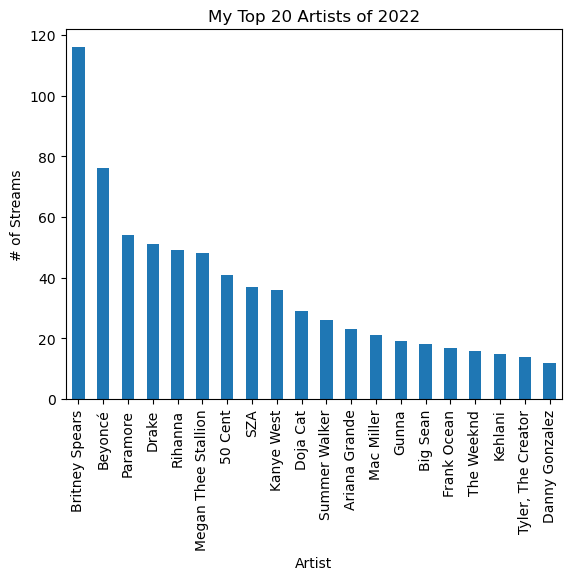

In [183]:
ax = df_2022['album_artist'].value_counts() \
    .head(20) \
    .plot(kind='bar', title='My Top 20 Artists of 2022')
ax.set_xlabel('Artist')
ax.set_ylabel('# of Streams')

In [184]:
my_streams = pd.concat([df_2020, df_2021, df_2022])

my_streams.shape

(5506, 5)

In [185]:
df_2020.shape

(1353, 5)

In [186]:
df_2021.shape

(2216, 5)

In [187]:
df_2022.shape

(1937, 5)

In [188]:
artist_counts = my_streams['album_artist'].value_counts().nlargest(20)
artist_counts

Beyoncé                186
Britney Spears         150
Megan Thee Stallion    145
Paramore               111
Rihanna                106
Drake                  101
Kanye West              92
Ariana Grande           86
Kehlani                 86
Doja Cat                81
Mac Miller              80
Summer Walker           79
Prince                  70
SZA                     60
50 Cent                 57
Frank Ocean             56
Tyler, The Creator      55
The Weeknd              44
Justin Bieber           43
Aaliyah                 41
Name: album_artist, dtype: int64

In [189]:
# add artist appearances column

grouped = my_streams.groupby(['album_artist']).size().reset_index(name='artist_appearances')

my_streams = my_streams.merge(grouped, on=['album_artist'], suffixes=('', '_count'))

In [190]:
my_streams.head()

,year,track_name,album_artist,album_title,play_count,artist_appearances
0,2020,ALREADY,Beyoncé,The Lion King: The Gift [Deluxe Edition],96,186
1,2020,OTHERSIDE,Beyoncé,The Lion King: The Gift [Deluxe Edition],48,186
2,2020,BLACK PARADE,Beyoncé,The Lion King: The Gift [Deluxe Edition],67,186
3,2020,BIGGER,Beyoncé,The Lion King: The Gift [Deluxe Edition],29,186
4,2020,FIND YOUR WAY BACK,Beyoncé,The Lion King: The Gift [Deluxe Edition],63,186


In [191]:
grouped = my_streams.groupby('year')
top_songs = grouped.apply(lambda x: x.nlargest(10, 'play_count')).reset_index(drop=True)
top_songs

,year,track_name,album_artist,album_title,play_count,artist_appearances
0,2020,positions,Ariana Grande,positions,184,86
1,2020,Do It,Chloe x Halle,Do It,177,34
2,2020,BELIEVE IT,PARTYNEXTDOOR,BELIEVE IT,173,3
3,2020,La Croix,Danny Gonzalez,La Croix,169,36
4,2020,Everybody Business,Kehlani,It Was Good Until It Wasn't,137,86
5,2020,nasty,Ariana Grande,Positions,137,86
6,2020,Toxic,Kehlani,It Was Good Until It Wasn't,135,86
7,2020,Can I,Kehlani,It Was Good Until It Wasn't,123,86
8,2020,Bad News,Kehlani,It Was Good Until It Wasn't,119,86
9,2020,34+35,Ariana Grande,Positions,118,86
